In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:

# Load train/test data
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")["Target"]
y_test = pd.read_csv("y_test.csv")["Target"]

In [3]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

In [4]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)              # Train
    y_pred = model.predict(X_test)           # Predict
    y_proba = model.predict_proba(X_test)[:,1]  # Probabilities for ROC-AUC
    
    # Metrics
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)


===== LogisticRegression =====
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2370
           1       0.73      0.39      0.51       447

    accuracy                           0.88      2817
   macro avg       0.81      0.68      0.72      2817
weighted avg       0.87      0.88      0.86      2817

ROC-AUC: 0.895611625558104
Confusion Matrix:
 [[2307   63]
 [ 273  174]]

===== RandomForest =====
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2370
           1       0.54      0.44      0.49       447

    accuracy                           0.85      2817
   macro avg       0.72      0.69      0.70      2817
weighted avg       0.84      0.85      0.85      2817

ROC-AUC: 0.8490192469251172
Confusion Matrix:
 [[2205  165]
 [ 250  197]]

===== GradientBoosting =====
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2370
  

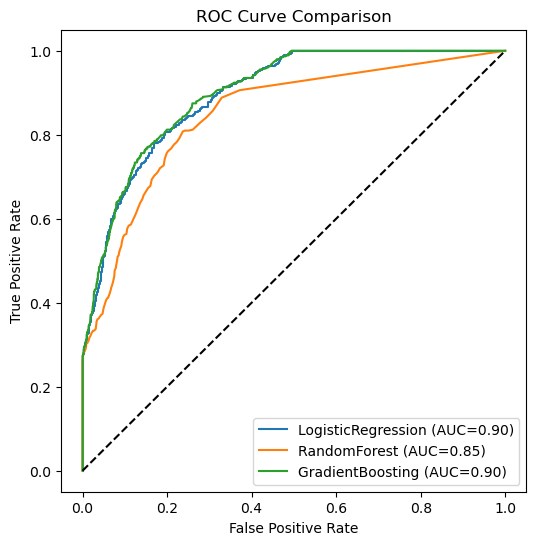

In [6]:
# ROC Curve Comparison
plt.figure(figsize=(6,6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_proba):.2f})")
    
    
plt.plot([0,1],[0,1], "k--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()